In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("black-friday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df = df.drop(columns=["Product_Category_3"])
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

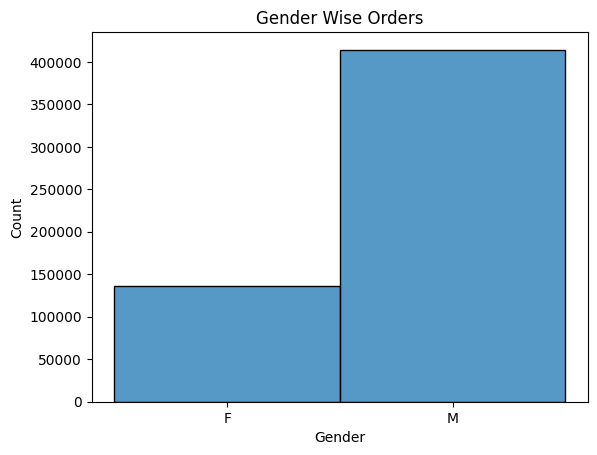

In [7]:
sns.histplot(df,x="Gender")
plt.title("Gender Wise Orders")
plt.show()

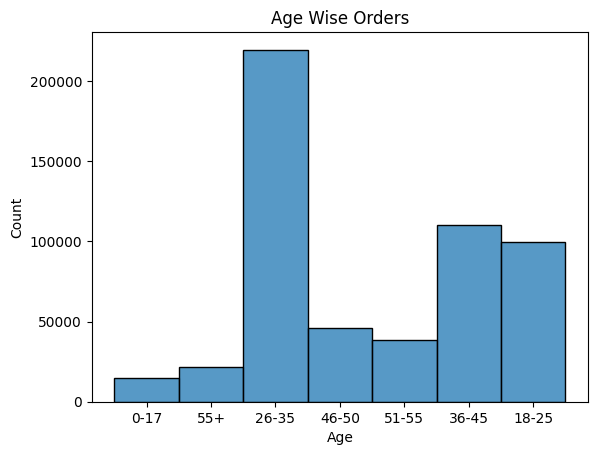

In [8]:
sns.histplot(df,x="Age")
plt.title("Age Wise Orders")
plt.show()

In [9]:
occ_val_counts = df["Occupation"].value_counts()

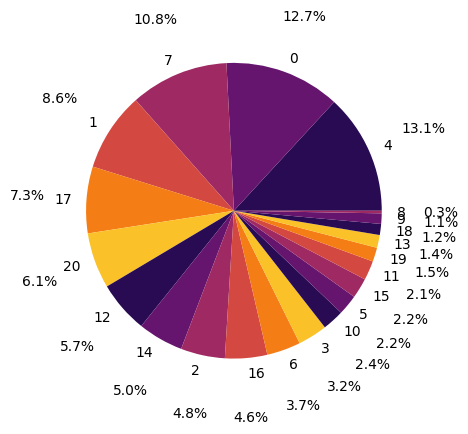

In [10]:
plt.pie(occ_val_counts.values, labels=occ_val_counts.index, autopct='%1.1f%%', colors=sns.color_palette('inferno'),pctdistance=1.4)
plt.show()

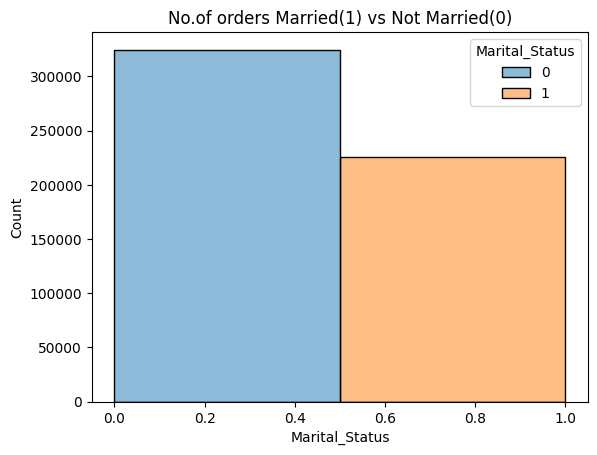

In [11]:
sns.histplot(df,x="Marital_Status",bins=2,hue = "Marital_Status")
plt.title("No.of orders Married(1) vs Not Married(0)")
plt.show()

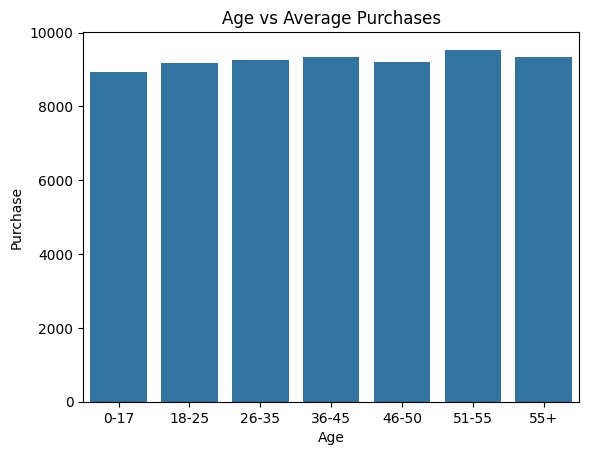

In [12]:
age_wise_purchases = df.groupby("Age")["Purchase"].agg("mean")

sns.barplot(age_wise_purchases)
plt.title("Age vs Average Purchases")
plt.show()

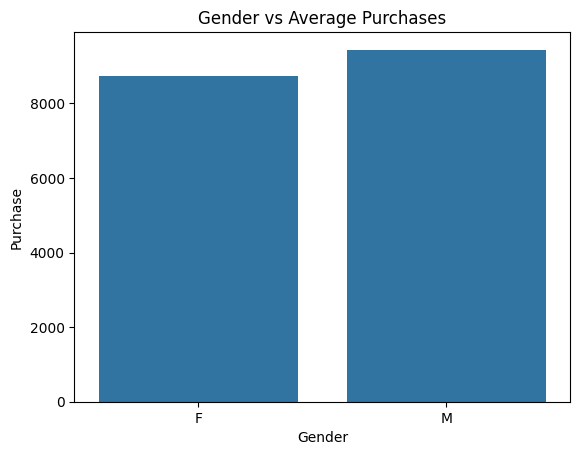

In [13]:
gender_wise_purchases = df.groupby("Gender")["Purchase"].agg("mean")

sns.barplot(gender_wise_purchases)
plt.title("Gender vs Average Purchases")
plt.show()

In [14]:
occ_val_counts = df["City_Category"].value_counts()

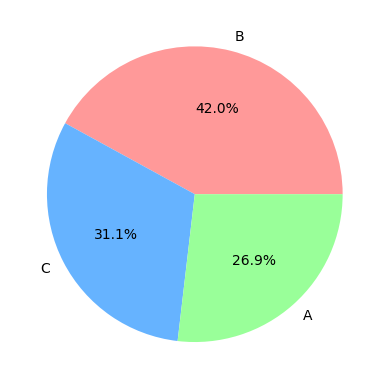

In [15]:
plt.pie(occ_val_counts.values, labels=occ_val_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.show()

In [16]:
df["Gender"] = df["Gender"].apply(lambda x: 2 if x == "M" else 1)
df["City_Category"] = df["City_Category"].apply(lambda x: 1 if x == "A" else 2 if x=="B" else 3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.2+ MB


<Axes: >

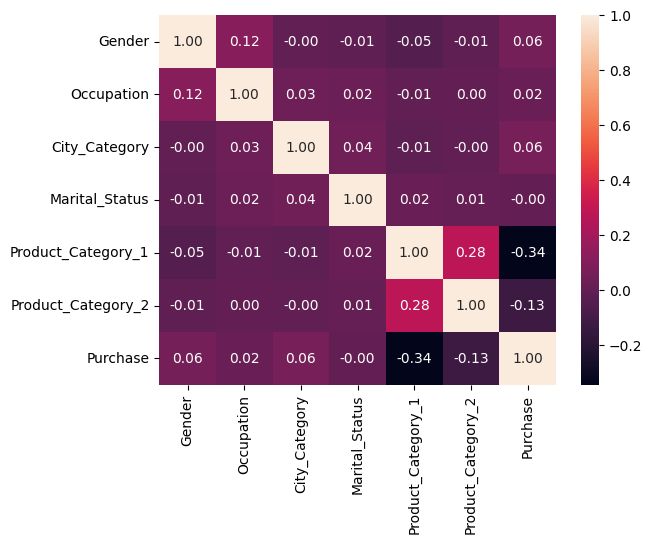

In [18]:
num_cols = df.select_dtypes(include=["number"]).columns[1:]

corr_mat = df[num_cols].corr()
sns.heatmap(corr_mat,annot = True,fmt = ".2f")

In [19]:
X = df[["Gender","City_Category","Product_Category_1","Product_Category_2"]]
Y = df["Purchase"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 30)

poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = Lasso(alpha = 20)
model.fit(X_train_poly,Y_train)

Y_pred = model.predict(X_test_poly)

r2 = r2_score(Y_test,Y_pred)
print(f"r_Squared Score: {r2}")

r_Squared Score: 0.21962748729079395
